# **Prediction using Supervised ML**
we will implement a linear regression model to predict the percentage of an student based on the number of study hours.




# **Importing Necessary Librairies**

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the Data**

In [2]:
url='http://bit.ly/w-data'
mydata=pd.read_csv(url)

print("Data imported successfully")
mydata.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Visualizing the Data**
Let's plot the data points on a two dimensions graph to visualize the data.

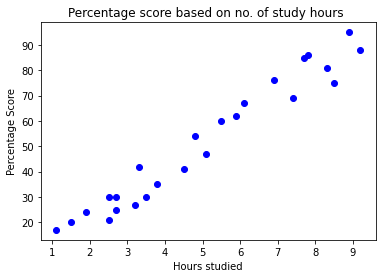

In [3]:
X = mydata['Hours']
y = mydata['Scores']
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set(title='Percentage score based on no. of study hours ' , 
       ylabel='Percentage Score' , xlabel= 'Hours studied')
ax.scatter(X,y,color='blue')
plt.show()

From the graphe above, it's clear that there is a positive linear relation between the number of hours studied and the students' percentage score.

# **The Decision Line**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


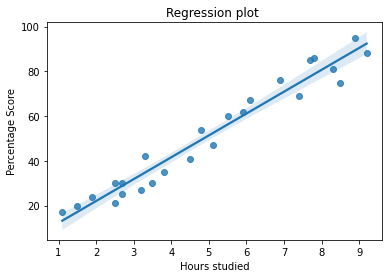

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [4]:
sns.regplot(X,y)
plt.title('Regression plot ')  
plt.ylabel('Percentage Score') 
plt.xlabel('Hours studied')
plt.show()
print(mydata.corr())

It's proven that the variables are positively correlated.



# **Choose Target and Features**
We start with deviding the data into target(output) as y and features(input) as X.

In [5]:
X = mydata.iloc[:,[0]].values
y = mydata.iloc[:,[1]].values

# **Splitting the Data**
We're going to use Scikit-Learn's built-in train_test_split() method to split the data to training data and testing data.



In [6]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# **Model Training**
We're going to train the model with the training data and then plot the regression line.

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

# **Making Predictions**
Now, let's make some predictions with our trained model using the testing data.

In [8]:
y_pred= lr.predict(X_test)

In [9]:
#comparing the actual values with the predicted ones
df=pd.DataFrame({'Hours': [k[0] for k in X_test],
                 'Predicted': [i[0] for i in y_pred],
                 'Actual': [j[0] for j in y_test]})
df

,Hours,Predicted,Actual
0,1.5,16.844722,20
1,3.2,33.745575,27
2,7.4,75.500624,69
3,2.5,26.786400,30
4,5.9,60.588106,62
5,3.8,39.710582,35
6,1.9,20.821393,24


# **Evaluating the Model**
To evaluate the model, we're going to use mean absolute error which is the mean the absolute values of the difference between the forecasted value and the actual value.

In [10]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute Error=',mean_absolute_error(y_test,y_pred))

Mean Absolute Error= 4.130879918502482


# **The percentage score of a student who studies 9.25 hours**

In [11]:
hours=np.array([9.25])
hours=hours.reshape(-1,1)
prediction = lr.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(prediction[0][0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
